In [3]:
# This is just an example that I followed from a guy but Im gonna look at another one he gave to mess around with

import pandas as pd
import random as random
teams = pd.read_csv("teams.csv")


In [4]:
# for index, row in teams.iterrows():
#     current_value = row['medals']
#     # Edit the value as needed
#     new_value = current_value + random.randint(1, 25)

#     # Update the value in the DataFrame
#     teams.at[index, 'medals'] = new_value
    
# teams.to_csv('teams.csv', index=False)

In [5]:
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,24
1,AFG,Afghanistan,1968,5,23.2,0.0,24
2,AFG,Afghanistan,1972,8,29.0,0.0,47
3,AFG,Afghanistan,1980,11,23.6,0.0,47
4,AFG,Afghanistan,2004,5,18.6,0.0,49
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,46
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,43
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,17
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,40


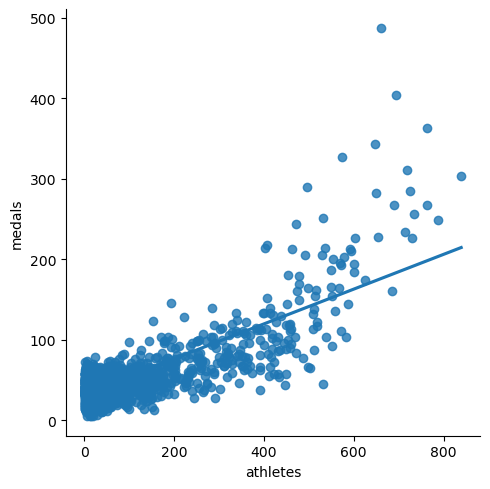

In [6]:
import seaborn as sns

sns.lmplot(x="athletes",y="medals", data=teams, fit_reg=True, ci=None)

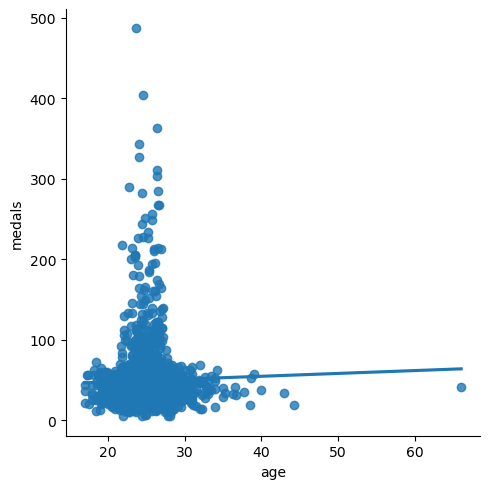

In [7]:
sns.lmplot(x="age",y="medals",data=teams,fit_reg=True,ci=None)

<Axes: ylabel='Frequency'>

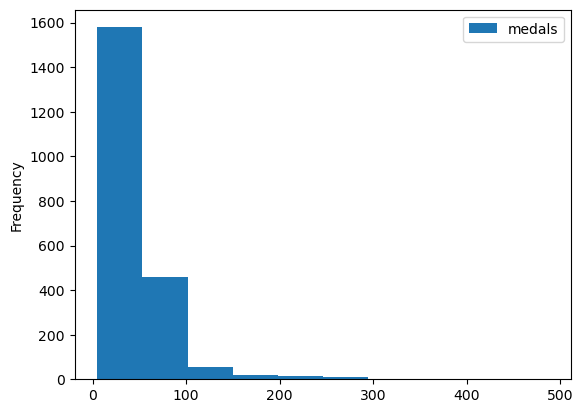

In [8]:
teams.plot.hist(y="medals")

In [9]:
teams[teams.isnull()].any(axis=1)
teams = teams.dropna()
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,24
1,AFG,Afghanistan,1968,5,23.2,0.0,24
2,AFG,Afghanistan,1972,8,29.0,0.0,47
3,AFG,Afghanistan,1980,11,23.6,0.0,47
4,AFG,Afghanistan,2004,5,18.6,0.0,49
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,46
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,43
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,17
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,40


In [10]:
# 80 20 split for it
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [11]:
# This is the actual training of the model

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predictors = ["athletes","prev_medals"]
target = "medals"
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [13]:
predictions = reg.predict(test[predictors])

In [14]:

test["predictions"] = predictions


In [15]:
test.loc[test["predictions"] < 0, "predictions"] = 0

In [16]:
test["predictions"] = test["predictions"].round()

In [17]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,43,38.0
7,AFG,Afghanistan,2016,3,24.7,1.0,52,38.0
24,ALB,Albania,2012,10,25.7,0.0,43,37.0
25,ALB,Albania,2016,6,23.7,0.0,44,37.0
37,ALG,Algeria,2012,39,24.8,2.0,52,41.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,37,37.0
2131,ZAM,Zambia,2012,7,22.6,0.0,69,37.0
2132,ZAM,Zambia,2016,7,24.1,0.0,41,37.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,40,40.0


In [67]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(test["medals"] , test["predictions"])

In [68]:
# off by a lot due to the fact that the data I added to the columns were randomly generated
error

11.849382716049382

In [18]:
# determine if error is good
teams.describe()["medals"]

count    2014.000000
mean       49.781529
std        35.795522
min         5.000000
25%        33.000000
50%        43.000000
75%        55.000000
max       487.000000
Name: medals, dtype: float64

In [19]:
# team by team
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,268,325.0
2054,USA,United States,2016,719,26.4,248.0,311,274.0


In [20]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,17,45.0
908,IND,India,2016,130,26.1,6.0,29,50.0


In [23]:
errors = (test["medals"] - test["predictions"]).abs()
errors

6        5.0
7       14.0
24       6.0
25       7.0
37      11.0
        ... 
2111     0.0
2131    32.0
2132     4.0
2142     0.0
2143     2.0
Length: 405, dtype: float64

In [24]:
error_by_team = errors.groupby(test["team"]).mean()

In [25]:
#How many errors off on average
error_by_team

team
AFG     9.5
ALB     6.5
ALG     7.5
AND    25.5
ANG     3.0
       ... 
VIE     2.0
VIN    15.5
YEM     2.0
ZAM    18.0
ZIM     1.0
Length: 204, dtype: float64

In [27]:
#how many medals were earned
medals = test["medals"].groupby(test["team"]).mean()
medals

team
AFG    47.5
ALB    43.5
ALG    49.0
AND    39.5
ANG    41.5
       ... 
VIE    37.0
VIN    34.5
YEM    39.0
ZAM    55.0
ZIM    38.5
Name: medals, Length: 204, dtype: float64

In [36]:
error_ratio = (error_by_team/medals)

In [39]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

<Axes: ylabel='Frequency'>

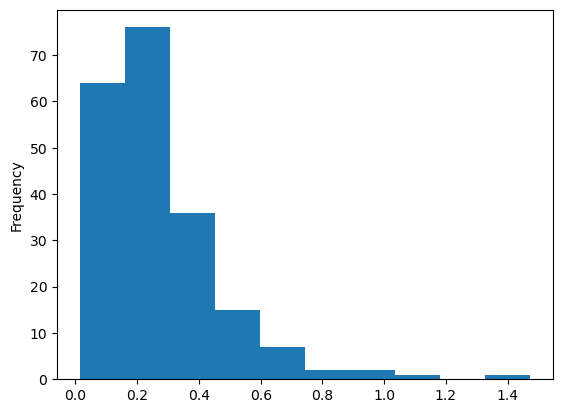

In [40]:
error_ratio.plot.hist()

In [41]:
error_ratio.sort_values()

team
SYR    0.013333
FRA    0.023077
SGP    0.023529
ZIM    0.025974
BER    0.027778
         ...   
PLE    0.804878
CUB    0.985507
SLO    1.022222
IND    1.065217
EGY    1.473684
Length: 204, dtype: float64

In [ ]:
# Could add in more predictors such as age 
# could use nueral networks or random forests???
# FInd more data on this